https://pythonhosted.org//imreg_dft/quickstart.html#installation

In [1]:
# !pip install matplotlib

In [2]:
import os

import scipy as sp
import scipy.misc

import matplotlib.pyplot as plt

import imreg_dft as ird


basedir = os.path.join('resources', 'examples')
# the TEMPLATE
im0 = plt.imread(os.path.join(basedir, "sample1.png"), True)[:,:,0]

# the image to be transformed
im1 = plt.imread(os.path.join(basedir, "sample3.png"), True)[:,:,0]

In [3]:
im0.shape

(300, 400)

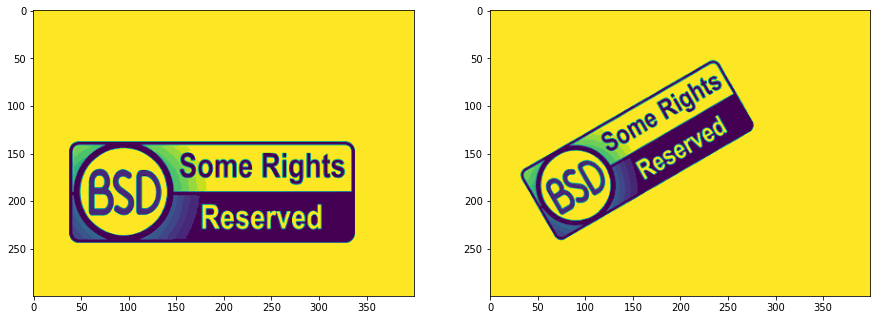

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(im0) # 
ax2.imshow(im1);

The full-blown similarity function that returns parameters (and the transormed image):

In [5]:
result = ird.similarity(im0, im1, numiter=3)

In [6]:
result

{'tvec': array([72.74645551, 34.84879232]),
 'success': 0.971306866873954,
 'angle': -30.047026237195325,
 'scale': 1.2492277072259879,
 'Dscale': 0.004012107875373878,
 'Dangle': 0.1125,
 'Dt': 0.25,
 'timg': array([[0.99207664, 0.9920697 , 0.9920619 , ..., 0.99209327, 0.9920883 ,
         0.9920829 ],
        [0.9920555 , 0.99204755, 0.992039  , ..., 0.99207425, 0.9920687 ,
         0.9920624 ],
        [0.99203765, 0.9920292 , 0.9920197 , ..., 0.9920583 , 0.9920522 ,
         0.9920454 ],
        ...,
        [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686],
        [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686],
        [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686]], dtype=float32)}

/Users/robin/Documents/GitHub/imreg_dft/venv/lib/python3.9/site-packages/imreg_dft/imreg.py:706: RuntimeWarning: divide by zero encountered in true_divide
  phase_norm = np.median(np.angle(im2 / im0) % (2 * np.pi))


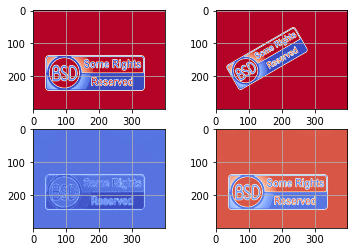

In [7]:
ird.imshow(im0, im1, result['timg'])
plt.show()

Just translation

/Users/robin/Documents/GitHub/imreg_dft/venv/lib/python3.9/site-packages/imreg_dft/imreg.py:706: RuntimeWarning: invalid value encountered in true_divide
  phase_norm = np.median(np.angle(im2 / im0) % (2 * np.pi))
/Users/robin/Documents/GitHub/imreg_dft/venv/lib/python3.9/site-packages/imreg_dft/imreg.py:706: RuntimeWarning: invalid value encountered in remainder
  phase_norm = np.median(np.angle(im2 / im0) % (2 * np.pi))


Translation is (19.9731, 15.0942), success rate 0.0405


/Users/robin/Documents/GitHub/imreg_dft/venv/lib/python3.9/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/robin/Documents/GitHub/imreg_dft/venv/lib/python3.9/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


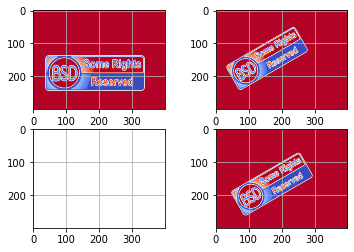

In [8]:
result = ird.translation(im0, im1)
tvec = result["tvec"].round(4)
# the Transformed IMaGe.
timg = ird.transform_img(im1, tvec=tvec)

print("Translation is {}, success rate {:.4g}"
      .format(tuple(tvec), result["success"]))

ird.imshow(im0, im1, timg)
plt.show()